<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Install all the necessary libraries and import them into the project.

import pandas as pd
import numpy as np

In [17]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [18]:
#Read and view the data set
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/forestfires.csv')
df = data
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
#data cleaning
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [23]:
#droping object data type
df = df.drop(['month', 'day'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 44.6 KB


In [12]:
#importing necesaries library for visualization.
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

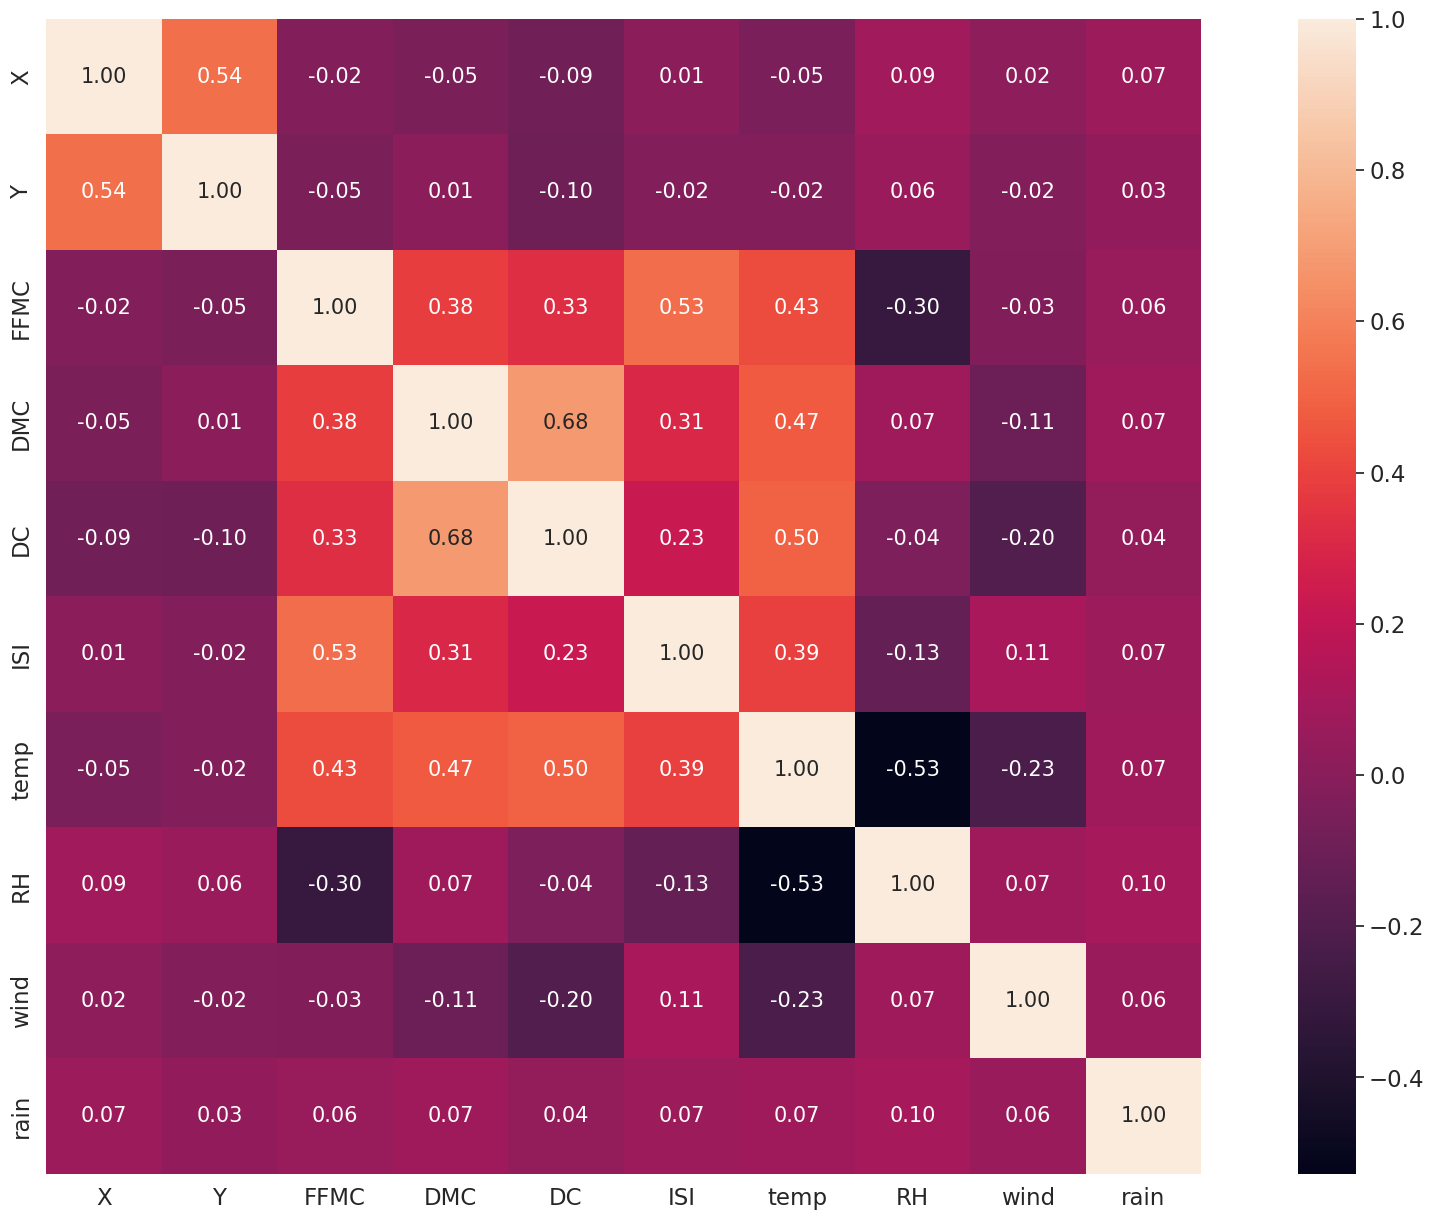

In [25]:
cols = df.drop ('area', axis=1).columns
cm = np.corrcoef ( df [cols] .values.T)
sns.set ( font_scale =1.5)
fig, ax = plt.subplots ( figsize =(25,15))
hm = sns.heatmap (cm,
 annot =True,
square=True,
 fmt ='.2f',
annot_kws ={ 'size': 15},
yticklabels =cols,
xticklabels =cols)
plt.show ()

In [29]:
# split into training and testing
from sklearn.model_selection import train_test_split

X = df.drop('area', axis=1)
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
#Perform standardization
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler ( )
scaler.fit ( X_train )
X_train = scaler.transform ( X_train )
X_test = scaler.transform ( X_test )

In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential ()

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
loss='mean_squared_error'
optimizer='adam'
metrics=['mae', 'mse']

In [33]:
#train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
11/11 [==============================] - 3s 117ms/step - loss: 2236.4148 - mae: 10.4450 - mse: 2236.4148 - val_loss: 1448.3020 - val_mae: 10.1176 - val_mse: 1448.3020
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 2206.7234 - mae: 10.8299 - mse: 2206.7234 - val_loss: 1423.6116 - val_mae: 10.7110 - val_mse: 1423.6116
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 2187.7651 - mae: 11.4503 - mse: 2187.7651 - val_loss: 1405.5449 - val_mae: 11.4779 - val_mse: 1405.5449
Epoch 4/50
11/11 [==============================] - 0s 21ms/step - loss: 2163.5713 - mae: 12.1503 - mse: 2163.5713 - val_loss: 1396.7189 - val_mae: 12.0869 - val_mse: 1396.7189
Epoch 5/50
11/11 [==============================] - 0s 15ms/step - loss: 2138.1448 - mae: 12.6611 - mse: 2138.1448 - val_loss: 1390.3922 - val_mae: 12.6238 - val_mse: 1390.3922
Epoch 6/50
11/11 [==============================] - 0s 19ms/step - loss: 2119.8159 - mae: 13.0588 - mse: 2119.8159

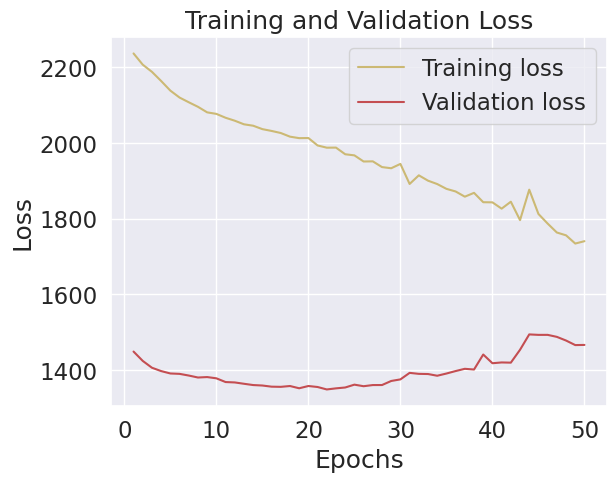

In [34]:
# Plot the training progress
from matplotlib import pyplot as plt

# Assuming you have a variable named "history" that contains the training history

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.show()

In [35]:
#Compute various metrics for assessing model quality
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
predictions = model.predict ( X_test )

4/4 [==============================] - 0s 4ms/step


In [36]:
mse = mean_squared_error ( y_test , predictions )
mae = mean_absolute_error ( y_test , predictions)
r2 = r2_score ( y_test , predictions)
print( 'Mean squared error from neural network:', mse )
print( 'Mean absolute error from neural network:', mae )
print( 'R2 score from neural network:', r2)

Mean squared error from neural network: 12051.814195300523
Mean absolute error from neural network: 29.190731552253265
R2 score from neural network: 0.0029311894951636885


In [ ]:
#The neural indicating that it may not be performing well in accurately predicting the target variable